In [1]:
from exp.nb_OS import *

# Example: Laser power of 400 mW with cell restoration

#### You have to choose between 400, 800, 1200, or "pooled"

In [2]:
laser_power= 400

## Load data

In [3]:
path= Path("data/")

In [4]:
X,y= load_data(path, laser_power=laser_power) 
X.shape, y.shape

((1746, 73), (1746,))

In [5]:
OS= OpticalStretcher(X,y)

In [6]:
X_train, X_test, y_train, y_test= OS.split_data()

## Fit, predict, and get statistics 

In [7]:
y_pred= OS.fit_and_predict(X_train, X_test, y_train, y_test, n_trees=500)

In [8]:
accuracy, sensitivity, specificity, cm= OS.get_stats(y_pred, y_test)

In [9]:
accuracy, sensitivity, specificity, cm

(0.6323319027181689, 0.7230769230769231, 0.517799352750809, array([[160, 149],
        [108, 282]]))

## Interpretation

In [10]:
OS.model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
res, idxs= OS.get_importances(X_test, y_test)

In [12]:
labels= X_test.columns[idxs]

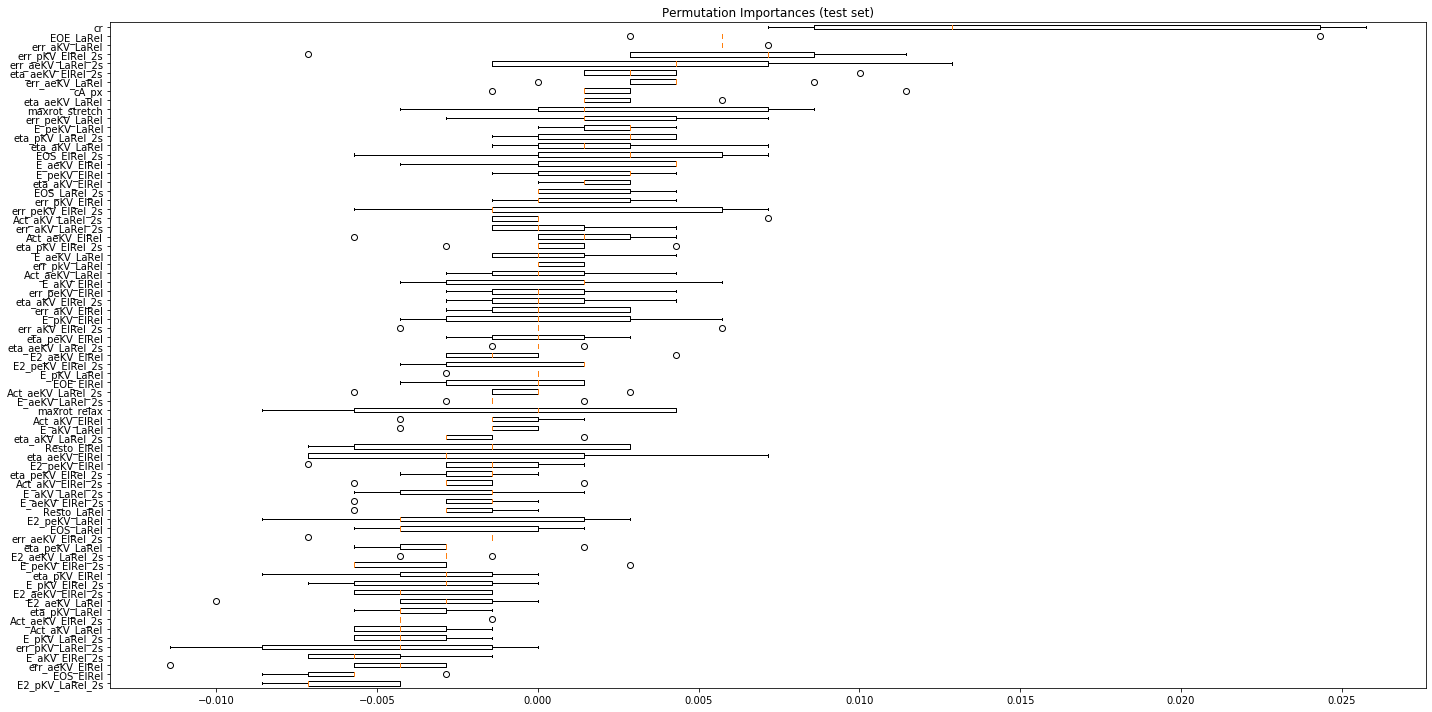

In [13]:
OS.plot_importances(res, idxs, labels)

### Here you can optimize parameters:
#### Save all parameters and additional columns with the median or mean value. Then you can re-run the lines above with a new list of parameters saved in df_imps:
>
 df_imps= pd.DataFrame(data= res.importances[idxs].T, columns= X_test.columns[idxs]).T
>
  df_imps["median"]= df_imps.iloc[:,:].median(axis=1)
>
  df_imps.to_pickle("feature_importances_400mW__with_resto.pkl")

#### You can drop columns with median/mean feature importance equal or less than 0.0, but the performance increases only slightly:

In [14]:
eps=0.000
cols2keep=[]
for c,v in zip(X_test.columns[idxs], np.median(res.importances[idxs].T,axis=0)):
    if v>eps:
        cols2keep.append(c)
print(len(cols2keep))

21


#### ... after that you can use these columns with the following option:

X,y= load_data(path, list(cols2keep), laser_power=laser_power) 

#### OS is a simple class. If you want info, just type:

In [15]:
OS??